# **Computer Vision :- Assignment 1**

### Q. Take a real image( Your own color photograph of size 256x256) and do the following

In [1]:
#importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## a) Read it to memory from the file

In [2]:
#import image
img=cv2.imread('profile.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [3]:
#image size
print("Image size is :- ", img.shape)

Image size is :-  (256, 256, 3)


## b) Display it 

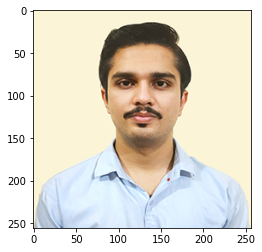

In [4]:
plt.imshow(img)

## c) Read a portion of it to memory

In [5]:
temp=img.copy()   #image slicing
image_part=temp[50:150, 90:170,:]

## d) display it


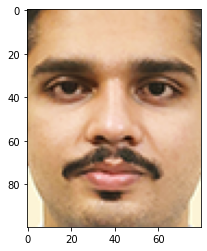

In [6]:
plt.imshow(image_part)

## e) add a constant to this portion and then display it

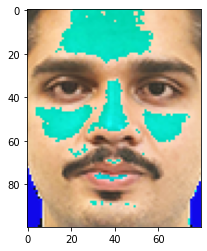

In [7]:
image_part +=20
plt.imshow(image_part)

## f) display the whole image after adding a constant to a portion of it. Take care of overflow while adding. ( on overflow, take the pixel vale as the maximum possible )

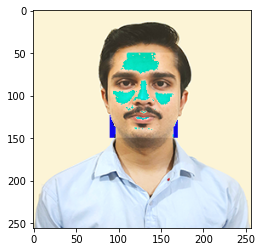

In [8]:
#to take care of overflow replace pixel with value greater than 255 with 255
temp[temp>255]=255
plt.imshow()

## g) multiply a portion of the image by a constant ranging from 0.1 to 2.0, truncating to maximum value on over flow. Display the resulting image for each value of the constant multiplier.


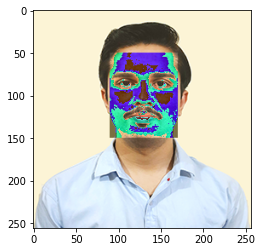

In [9]:
#create new portion
temp=img.copy()
image_part2=temp[50:150, 90:170,:]

#multiply by constant 1.5
np.multiply(image_part2,1.5,out=image_part2,casting='unsafe')
temp[temp>255]=255

plt.imshow(temp)

## h) Create a second image which contains only your name and date of doing the assignment, and embed this to to your photograph as a visible watermark.

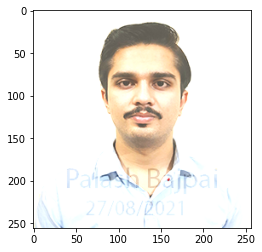

In [10]:
watermark=cv2.imread('watermark.png')

temp=img.copy()
cv2.addWeighted(watermark,0.2,temp,1,0,temp)

#display image
plt.imshow(temp)

## i) Embed the second image(name &date) as an invisible watermark in your photograph. (also write code for extracting the watermark)


Text(0.5, 1.0, 'Watermark image')

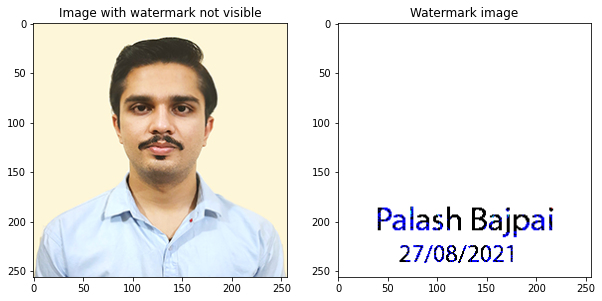

In [11]:
image=img.copy()
watermark_img=img.copy()

opacity=0.01
image=image+watermark*opacity
image[image>255]=255
image=image.astype('uint8')
rows,cols=1,2

fig=plt.figure(figsize=(10,10))
fig.add_subplot(rows,cols,1)
plt.imshow(image)
plt.title("Image with watermark not visible")

#Retriving the watermark
l,b,h=img.shape
for i in range(l):
  for j in range(b):
    for k in range(h):
      if(image[i,j,k]!=255):
        watermark_img[i,j,k]=(image[i,j,k]-watermark_img[i,j,k])/opacity

watermark_img[watermark_img>128]=255
watermark_img[watermark_img<128]=0

fig.add_subplot(rows,cols,2)
plt.imshow(watermark_img)
plt.title("Watermark image")


##j) Embed a text message in the image.(Text message should be your name and roll no.)

In [12]:
from PIL import ImageDraw,Image

Text(0.5, 1.0, 'Watermark')

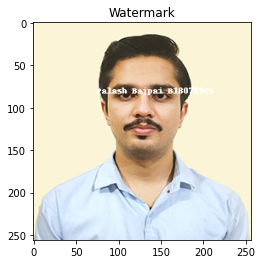

In [13]:
temp=Image.open('profile.png')
draw=ImageDraw.Draw(temp)
text="Palash Bajpai B180759CS"

draw.text((75,75),text)
plt.imshow(temp)
plt.title("Watermark")










## k) Convert the RGB image into XYZ Color Space and Display the luminance and chrominance images separately

Text(0.5, 1.0, 'Luminance and Chrominance image')

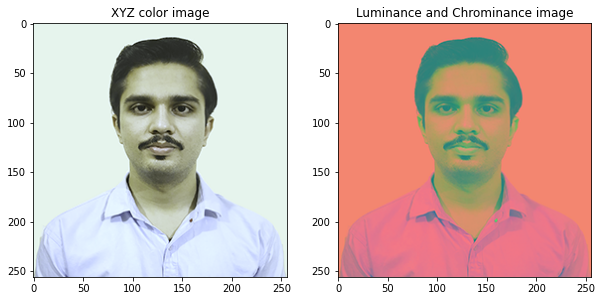

In [14]:
#convert to XYZ color schema

XYZ=cv2.cvtColor(img,cv2.COLOR_RGB2XYZ)

#convert to luminance and chrominance
lc=cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)

fig=plt.figure(figsize=(10,10))
rows,cols=1,2

#plot 1 (XYZ image)
fig.add_subplot(rows,cols,1)
plt.imshow(XYZ)
plt.title("XYZ color image")


#plot 2 (LC image)
fig.add_subplot(rows,cols,2)
plt.imshow(lc)
plt.title("Luminance and Chrominance image")



##l) Convert the Color image into a grayscale image.

Text(0.5, 1.0, 'Grayscale Image')

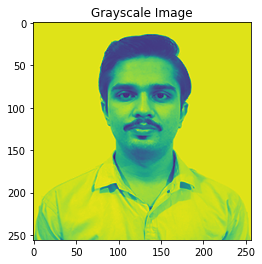

In [15]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.title("Grayscale Image")

## m)Apply thresholding on the grayscale using 4 different threshold values(e.g, 50, 128, 175, & 220) and display the 4 output images.

Text(0.5, 1.0, 'Threshold value 220')

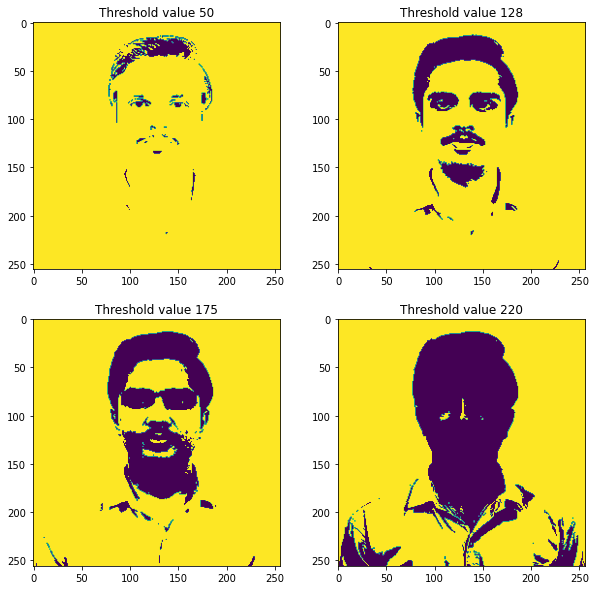

In [16]:
ret,th1=cv2.threshold(gray,50,256,cv2.THRESH_BINARY)
ret,th2=cv2.threshold(gray,128,256,cv2.THRESH_BINARY)
ret,th3=cv2.threshold(gray,175,256,cv2.THRESH_BINARY)
ret,th4=cv2.threshold(gray,220,256,cv2.THRESH_BINARY)

rows,cols=2,2
fig=plt.figure(figsize=(10,10))

fig.add_subplot(rows,cols,1)
plt.imshow(th1)
plt.title("Threshold value 50")

fig.add_subplot(rows,cols,2)
plt.imshow(th2)
plt.title("Threshold value 128")

fig.add_subplot(rows,cols,3)
plt.imshow(th3)
plt.title("Threshold value 175")

fig.add_subplot(rows,cols,4)
plt.imshow(th4)
plt.title("Threshold value 220")